# Titanic - Machine Learning from disaster

This notebook is created to participate in this Kaggle competition: https://www.kaggle.com/c/titanic/overview

## 1. Studying the data and preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


traindf = pd.read_csv("train.csv")
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
traindf["Sex"] = traindf["Sex"].map({"male": 0, "female": 1})
traindf = traindf.drop(["PassengerId"], axis=1)
traindf = traindf.drop(["Name"], axis=1)
traindf = traindf.drop_duplicates()

df_dummies = pd.get_dummies(traindf['Embarked'])
traindf = pd.concat([traindf, df_dummies], axis=1)
traindf = traindf.drop(["Embarked"], axis=1)
traindf['Cabin'] = traindf['Cabin'].isna().apply(lambda x: 0 if x else 1)

traindf= traindf.drop(["Ticket"],axis=1)

traindf.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
886,0,2,0,27.0,0,0,13.00,0,0,0,1
887,1,1,1,19.0,0,0,30.00,1,0,0,1
888,0,3,1,NaN,1,2,23.45,0,0,0,1
889,1,1,0,26.0,0,0,30.00,1,1,0,0
890,0,3,0,32.0,0,0,7.75,0,0,1,0


In [3]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    int64  
 1   Pclass    876 non-null    int64  
 2   Sex       876 non-null    int64  
 3   Age       711 non-null    float64
 4   SibSp     876 non-null    int64  
 5   Parch     876 non-null    int64  
 6   Fare      876 non-null    float64
 7   Cabin     876 non-null    int64  
 8   C         876 non-null    uint8  
 9   Q         876 non-null    uint8  
 10  S         876 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 64.2 KB


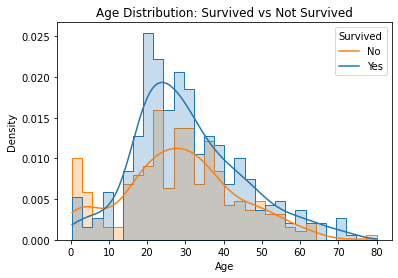

In [4]:
sns.histplot(data=traindf, x='Age', hue='Survived', kde=True, bins=30, element='step', stat='density', common_norm=True)
plt.title('Age Distribution: Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

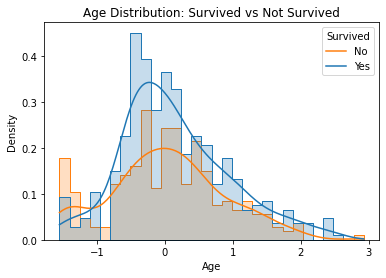

In [5]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
traindf['Age'] = scaler.fit_transform(traindf[['Age']])

sns.histplot(data=traindf, x='Age', hue='Survived', kde=True, bins=30, element='step', stat='density', common_norm=True)
plt.title('Age Distribution: Survived vs Not Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

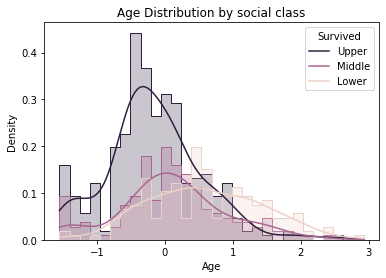

In [6]:
sns.histplot(data=traindf, x='Age', hue='Pclass', kde=True, bins=30, element='step', stat='density', common_norm=True)
plt.title('Age Distribution by social class')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Upper', 'Middle', 'Lower'])
plt.show()

In [7]:
traindf['Age'] = traindf['Age'].fillna(traindf.groupby('Pclass')['Age'].transform('mean'))

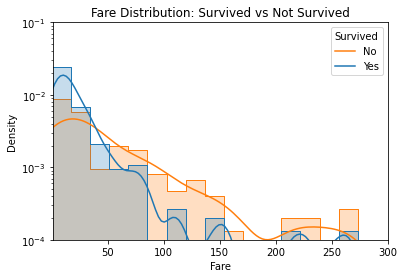

In [8]:
sns.histplot(data=traindf, x='Fare', hue='Survived', kde=True, bins=30, element='step', stat='density', common_norm=True)
plt.yscale('log')
plt.title('Fare Distribution: Survived vs Not Survived')
plt.xlim(1, 300) 
plt.ylim(0.0001, 0.1)  

plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

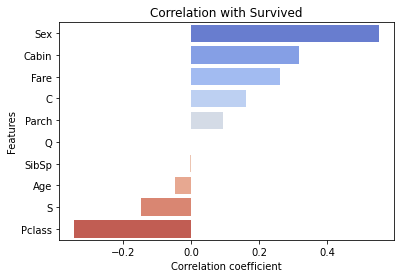

In [9]:
correlations = traindf.corr()['Survived'].sort_values(ascending=False)
correlations = correlations.drop('Survived')

sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlation with Survived')
plt.xlabel('Correlation coefficient')
plt.ylabel('Features')
plt.show()

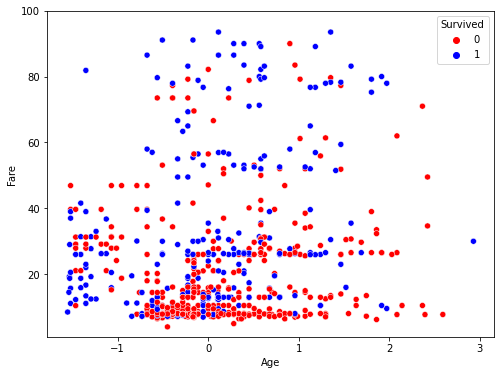

In [10]:
palette = {0: "red", 1: "blue"}

plt.figure(figsize=(8, 6))
sns.scatterplot(
    y=traindf["Fare"], 
    x=traindf["Age"], 
    hue=traindf["Survived"], 
    palette=palette
)


plt.ylim(1, 100)

plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")

# Show the plot
plt.show()

In [11]:
missing_cabin = traindf[traindf['Cabin'] == 0]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Cabin missing): {survival_rate_missing_cabin:.2%}")

missing_cabin = traindf[traindf['Cabin'] == 1]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Cabin known): {survival_rate_missing_cabin:.2%}")

Survival rate (Cabin missing): 29.87%
Survival rate (Cabin known): 66.50%


In [12]:
missing_cabin = traindf[traindf['Q'] == 1]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Cherbourg): {survival_rate_missing_cabin:.2%}")

missing_cabin = traindf[traindf['S'] == 1]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Queenstown): {survival_rate_missing_cabin:.2%}")

missing_cabin = traindf[traindf['C'] == 1]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Southampton): {survival_rate_missing_cabin:.2%}")

Survival rate (Cherbourg): 38.16%
Survival rate (Queenstown): 33.97%
Survival rate (Southampton): 54.55%


In [13]:
missing_cabin = traindf[traindf['Sex'] == 0]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Male): {survival_rate_missing_cabin:.2%}")

missing_cabin = traindf[traindf['Sex'] == 1]
survival_rate_missing_cabin = missing_cabin['Survived'].mean()
print(f"Survival rate (Female): {survival_rate_missing_cabin:.2%}")

Survival rate (Male): 18.63%
Survival rate (Female): 74.92%


## 2. Choosing the Model

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

trainAy = traindf["Survived"]
traindf = traindf.drop(["Survived"], axis=1)
trainAx = traindf.values

x_train, x_test, y_train, y_test = train_test_split(trainAx, trainAy, test_size=0.2, random_state=42) 

In [15]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                   
    scoring='accuracy',      
    verbose=1,
    n_jobs=-1              
)

grid_search.fit(trainAx, trainAy)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best score: 0.8413246753246753


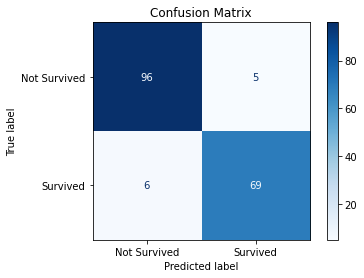

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## 3. Applying the model to the test file

In [17]:
data = pd.read_csv("test.csv")
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})
Id = pd.DataFrame(data["PassengerId"].values)
data = data.drop(["PassengerId"], axis=1)
data = data.drop(["Name"], axis=1)

df_dummies = pd.get_dummies(data['Embarked'])
data = pd.concat([data, df_dummies], axis=1)
data = data.drop(["Embarked"], axis=1)
data['Cabin'] = data['Cabin'].isna().apply(lambda x: 0 if x else 1)

data = data.drop(["Ticket"],axis=1)


data['Age'] = scaler.fit_transform(data[['Age']])

mean_age_per_class = traindf.groupby('Pclass')['Age'].mean()
data['Age'] = data.apply(
    lambda row: mean_age_per_class[row['Pclass']] if pd.isna(row['Age']) else row['Age'],
    axis=1
)
data.head(11)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,3,0,0.366197,0,0,7.8292,0,0,1,0
1,3,1,1.070423,1,0,7.0000,0,0,0,1
2,2,0,1.915493,0,0,9.6875,0,0,1,0
3,3,0,-0.056338,0,0,8.6625,0,0,0,1
4,3,1,-0.338028,1,1,12.2875,0,0,0,1
5,3,0,-0.788732,0,0,9.2250,0,0,0,1
6,3,1,0.112676,0,0,7.6292,0,0,1,0
7,2,0,-0.112676,1,1,29.0000,0,0,0,1
8,3,1,-0.563380,0,0,7.2292,0,1,0,0
9,3,0,-0.394366,2,0,24.1500,0,0,0,1


In [19]:
X_data = data.values
y_predicted = best_model.predict(X_data)
submission = pd.DataFrame(y_predicted)
submission.head()

,0
0,0
1,0
2,0
3,0
4,0


In [20]:
merged_df = pd.merge(Id, submission, left_index=True, right_index=True)
merged_df.rename(columns={'0_x': 'PassengerId', '0_y': 'Survived'}, inplace=True)
merged_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [21]:
merged_df.to_csv('filename.csv', index=False)